# Exploratory Data Analysis (EDA)

**Purpose:**  
This notebook provides an exploratory overview of the *Winter Cereals Weeds Image Dataset*.  
The goal is to understand the dataset’s structure, distribution of classes, and visual characteristics of the images before building any machine learning models.

## Imports

Load core libraries used throughout the EDA to explore and visualize the weed image dataset.

**Libraries**
- `matplotlib.pyplot as plt` — plotting utilities for figures, axes, and charts.
- `numpy as np` — numerical computing and array operations.
- `pathlib` — convenient, cross-platform filesystem path handling.
- `matplotlib.image as mpimg` — image I/O for quickly reading and displaying images (e.g., `mpimg.imread`).
- `random` — simple random sampling (e.g., to pick random images per class for preview grids).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import matplotlib.image as mpimg
import random

## Dataset Path Setup
  
Define the path to the dataset folder and print its absolute location to verify that the notebook points to the correct directory.

In [ ]:
data_dir = pathlib.Path("../data/raw/Winter_cereals_weeds_image_dataset")
print(data_dir.resolve())

C:\Users\tim-b\Desktop\Projekte\Weed_identification\data\raw\Winter_cereals_weeds_image_dataset


## Count Images

Count the total number of images in the dataset to verify consistency with the dataset description.

In [8]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

10810

## Count Images per Class
 
Compute the number of images for each weed species (subfolder) and verify the total image count.

In [4]:
image_counts = {}
total = 0

for class_dir in data_dir.iterdir():
    if class_dir.is_dir():
        count = len(list(class_dir.glob("*.jpg")))
        image_counts[class_dir.name] = count
        total += count

for name, count in image_counts.items():
    print(f"{name}: {count} images")

print(f"Total images: {total}")

Avena_sterilis: 1839 images
Convolvulus_arvensis: 755 images
Fumaria_officinalis: 877 images
Lolium_multiflorum: 1404 images
Papaver_rhoeas: 2822 images
Veronica_persica: 1457 images
Vicia_sativa: 1656 images
Total images: 10810


## Visualize Class Distribution

Create a bar chart to visualize the number of images available for each weed species (class) and save the figure for documentation.

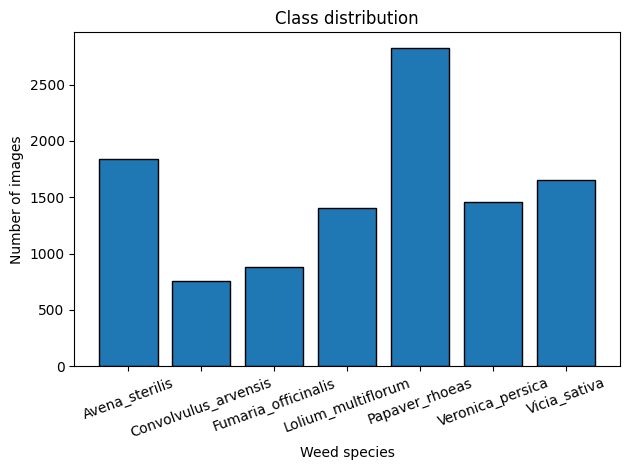

In [5]:
classes = list(image_counts.keys())
counts = list(image_counts.values())

plt.bar(classes, counts, edgecolor="black")
plt.title("Class distribution")
plt.xlabel("Weed species")
plt.ylabel("Number of images")
plt.xticks(rotation=20)
plt.tight_layout()

plt.savefig("../results/figures/class_distribution.png", dpi = 300)
plt.show()


**Conclusion:**  

- The dataset is **imbalanced**: some species have significantly more images than others.  
- This imbalance could bias the model towards well-represented classes and may need to be addressed with techniques such as class weights or data augmentation.

## Display Sample Images from One Class
 
Randomly visualize a selection of images from a specific class to gain an intuitive understanding of the dataset.

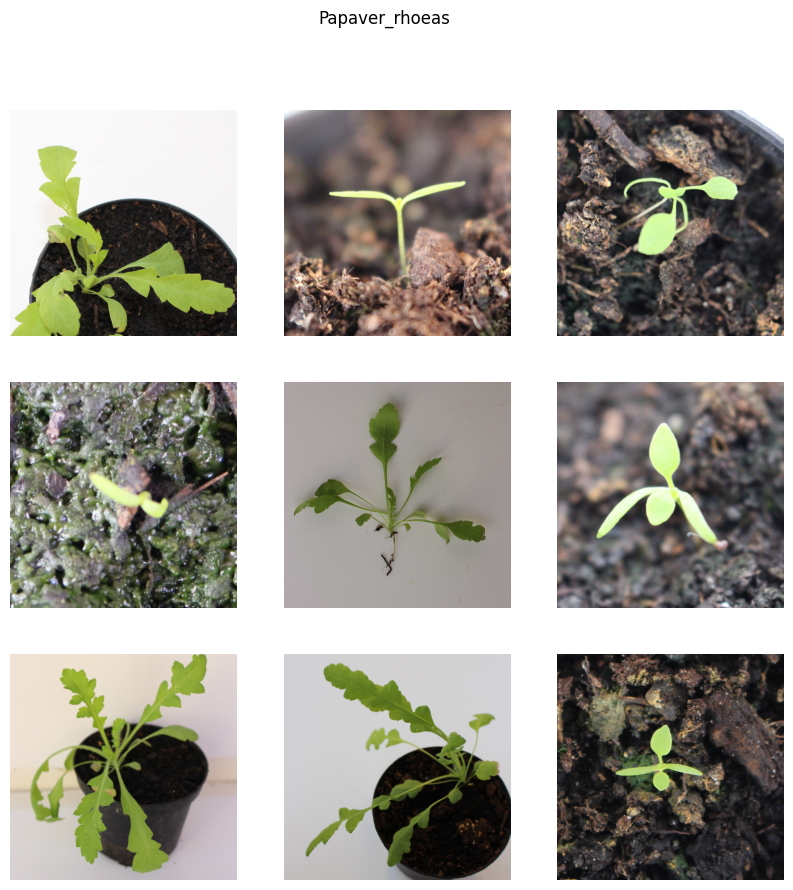

In [ ]:
class_name = "Papaver_rhoeas"
img_paths = list((data_dir / class_name).glob("*.jpg"))

plt.figure(figsize=(10, 10))
for i in range(9):
    img = mpimg.imread(random.choice(img_paths))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.suptitle(class_name)
plt.show()